**ANÁLISIS DESCRIPTIVO**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import levene

In [25]:
df = pd.read_excel('resultados.xlsx')
df

,Optimizador,Tiempo,Mean
0,ADAM,1224,10.34
1,ADAM,923,11.54
2,ADAM,912,12.11
3,ADAM,987,8.81
4,ADAM,1051,17.87
5,ADAM,1144,12.83
6,ADAM,1235,13.23
7,ADAM,1003,11.74
8,ADAM,992,11.54
9,ADAM,909,13.08


ANÁLISIS GLOBAL DEL TIEMPO

In [26]:
media_tiempo = df['Tiempo'].mean()
desviacion_tiempo = df['Tiempo'].std()
varianza_tiempo = df['Tiempo'].var()
maximo_tiempo = df['Tiempo'].max()
minimo_tiempo = df['Tiempo'].min()

In [27]:
print('Media tiempo:',media_tiempo)
print('Desviacion tiempo:',desviacion_tiempo)
print('Varianza tiempo:',varianza_tiempo)
print('Maximo tiempo:',maximo_tiempo)
print('Minimo tiempo:',minimo_tiempo)


Media tiempo: 734.65
Desviacion tiempo: 200.8841418866568
Varianza tiempo: 40354.43846153846
Maximo tiempo: 1235
Minimo tiempo: 498


ANÁLISIS GLOBAL DE LA ACCURACY

In [28]:
media_accuracy = df['Mean'].mean()
desviacion_accuracy = df['Mean'].std()
varianza_accuracy = df['Mean'].var()
maximo_accuracy = df['Mean'].max()
minimo_accuracy = df['Mean'].min()

In [29]:
print('Media accuracy:',media_accuracy)
print('Desviacion accuracy:',desviacion_accuracy)
print('Varianza accuracy:',varianza_accuracy)
print('Maximo accuracy:',maximo_accuracy)
print('Minimo accuracy:',minimo_accuracy)

Media accuracy: 36.16250000000001
Desviacion accuracy: 37.47272312236099
Varianza accuracy: 1404.2049782051279
Maximo accuracy: 100.0
Minimo accuracy: 8.81


ANÁLISIS INDIVIDUAL TIEMPO

In [30]:
grupo_optimizador = df.groupby('Optimizador')
media_por_optimizador = grupo_optimizador.mean()

# Aplica múltiples funciones agregadas usando el método agg
resultados_agregados = grupo_optimizador.agg({
    'Tiempo': ['mean', 'std', 'var', 'max', 'min']
})

# Imprime el resultado
print(resultados_agregados)

             Tiempo                                     
               mean         std           var   max  min
Optimizador                                             
ADAGRAD       610.3   56.641269   3208.233333   696  520
ADAM         1038.0  123.150315  15166.000000  1235  909
RMSPROP       730.5   47.223464   2230.055556   832  676
SDG           559.8   29.146374    849.511111   611  498


ANÁLISIS INDIVIDUAL ACCURACY

In [31]:
# Aplica múltiples funciones agregadas usando el método agg
resultados_agregados2 = grupo_optimizador.agg({
    'Mean': ['mean', 'std', 'var', 'max', 'min']
})

# Imprime el resultado
print(resultados_agregados2)

                Mean                                    
                mean       std       var     max     min
Optimizador                                             
ADAGRAD      100.000  0.000000  0.000000  100.00  100.00
ADAM          12.309  2.364198  5.589432   17.87    8.81
RMSPROP       19.339  2.820845  7.957166   25.02   16.13
SDG           13.002  0.783650  0.614107   14.45   11.92


GRÁFICOS BOXPLOT (TIEMPO & ACCURACY)

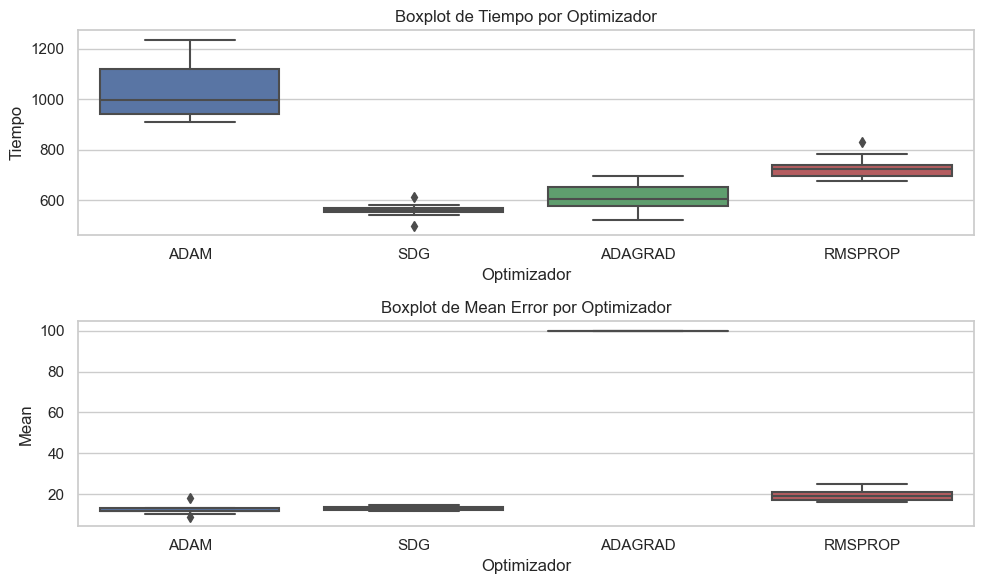

In [32]:
# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crea un diagrama de cajas para la variable 'Tiempo'
plt.subplot(2, 1, 1)  # 2 filas, 1 columna, primer gráfico
sns.boxplot(x='Optimizador', y='Tiempo', data=df)
plt.title('Boxplot de Tiempo por Optimizador')

# Crea un diagrama de cajas para la variable 'Mean'
plt.subplot(2, 1, 2)  # 2 filas, 1 columna, segundo gráfico
sns.boxplot(x='Optimizador', y='Mean', data=df)
plt.title('Boxplot de Mean Error por Optimizador')

# Ajusta el diseño del gráfico
plt.tight_layout()

# Muestra el gráfico
plt.show()

RESIDUOS

                     sum_sq    df            F        PR(>F)
C(Optimizador)  54636.54781   3.0  5144.428422  1.956484e-47
Residual          127.44634  36.0          NaN           NaN


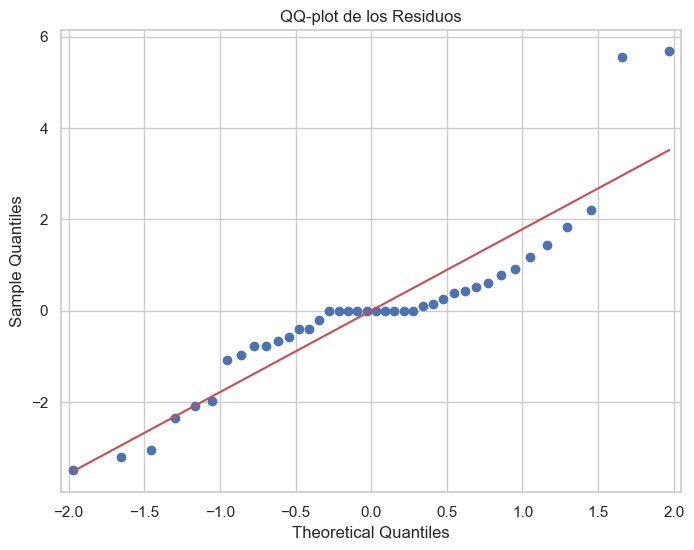

In [33]:
# Importing library
modelo_anova = sm.formula.ols('Mean ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()

                   sum_sq    df          F        PR(>F)
C(Optimizador)  1380738.9   3.0  85.811614  1.821283e-16
Residual         193084.2  36.0        NaN           NaN


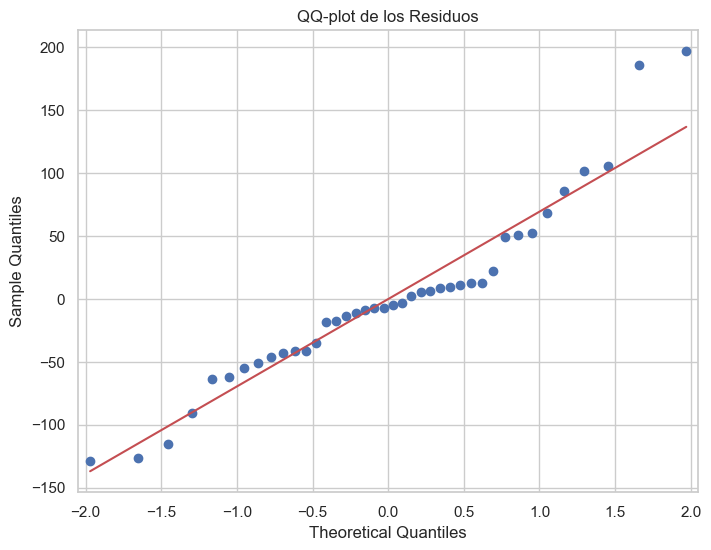

In [34]:
# Importing library
modelo_anova = sm.formula.ols('Tiempo ~ C(Optimizador)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo_anova, typ=2)

# Imprime la tabla ANOVA
print(anova_table)

# Calcula los residuos
residuos = modelo_anova.resid

# Configura el estilo y el tamaño del gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Crea un QQ-plot de los residuos
sm.qqplot(residuos, line='s', ax=plt.gca())
plt.title('QQ-plot de los Residuos')

# Muestra el gráfico
plt.show()

ESTADÍSTICOS

In [35]:
grupos = [df['Mean'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza
estadistico_levene, p_valor = levene(*grupos)

# Imprime los resultados
print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Evalúa la significancia estadística del resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas.")


Estadístico de Levene: 6.548314240766526
Valor p: 0.0011975902305806868
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.


In [36]:
grupos = [df['Tiempo'][df['Optimizador'] == optimizador] for optimizador in df['Optimizador'].unique()]

# Realiza la prueba de Levene para homogeneidad de varianza
estadistico_levene, p_valor = levene(*grupos)

# Imprime los resultados
print("Estadístico de Levene:", estadistico_levene)
print("Valor p:", p_valor)

# Evalúa la significancia estadística del resultado
nivel_significancia = 0.05
if p_valor < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. Las varianzas son homogéneas.")

Estadístico de Levene: 4.1817496773727765
Valor p: 0.012238128667953804
Se rechaza la hipótesis nula. Hay evidencia de diferencias significativas en las varianzas.
